In [1]:
import matplotlib.pyplot as plt

from scipy.ndimage.interpolation import zoom
from keras.preprocessing.image import load_img, img_to_array
from keras.applications.vgg16 import VGG16, preprocess_input, decode_predictions

import numpy as np
import os
import interpretutils 

Using TensorFlow backend.


In [2]:
model = VGG16(include_top=True, weights='imagenet',input_shape=(224,224,3))

Class activation map for: ('n02108089', 'boxer', 0.42014137)


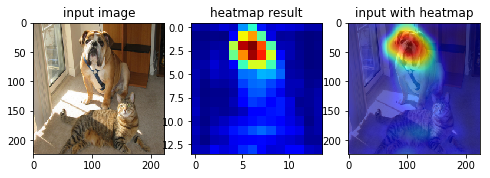

Class activation map for: ('n02090622', 'borzoi', 0.2018977)


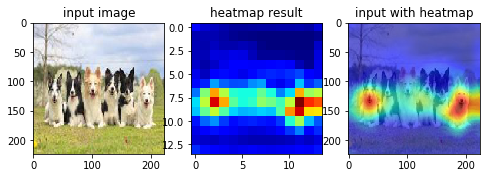

Class activation map for: ('n02106166', 'Border_collie', 0.67478704)


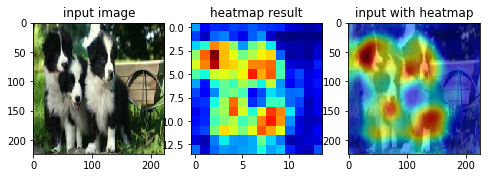

Class activation map for: ('n01751748', 'sea_snake', 0.5346081)


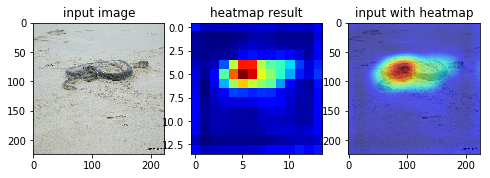

Class activation map for: ('n02006656', 'spoonbill', 0.9999374)


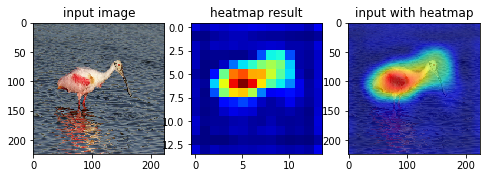

Saved all results in './results'


In [5]:
paths = ["cat_dog.png","multiple_dogs.jpg","collies.JPG","snake.JPEG","water-bird.JPEG"]

plt.rcParams['figure.figsize'] = 8,8
for path in paths:
    savepath = os.path.join("results",path)
    img_path = os.path.join("image",path)
    orig_img = np.array(load_img(img_path,target_size=(224,224)),dtype=np.uint8)
    img = np.array(load_img(img_path,target_size=(224,224)),dtype=np.float64)
    img = np.expand_dims(img,axis=0)
    img = preprocess_input(img)
    
    predictions = model.predict(img)
    top_n = 5
    top = decode_predictions(predictions, top=top_n)[0]
    cls = np.argsort(predictions[0])[-top_n:][::-1]
    
#     cam, raw_cam = interpretutils.grad_cam(model, img, layer_name='block5_conv3')
    cam, raw_cam = interpretutils.grad_cam_plus(model, img, layer_name='block5_conv3')
    
    print("Class activation map for:",top[0])

    fig, ax = plt.subplots(nrows=1,ncols=3)
    plt.subplot(131)
    plt.imshow(orig_img)
    plt.title("input image")

    plt.subplot(132)
    plt.imshow(raw_cam,cmap="jet")
    plt.title("heatmap result")

    plt.subplot(133)
    plt.imshow(orig_img)
    plt.imshow(cam,alpha=0.6,cmap="jet")
    plt.title("input with heatmap")

    plt.show()

    if savepath is not None:
        fig.savefig(savepath)
print("Saved all results in './results'")